In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/home/shreyas_204/Downloads/a1_data/a1_d1.csv', header=None)
data

,0,1,2
0,-0.598283,1.023534,1
1,1.115929,0.512127,1
2,1.169815,-1.072747,0
3,0.631926,-0.255663,0
4,0.052532,1.198445,1
...,...,...,...
995,-1.226337,-0.507286,0
996,0.107578,0.634166,1
997,-0.317336,-0.357282,0
998,-0.295127,0.746446,1


In [3]:
X_data = []
Y_data = []
positive = []
negative = []


x, y = data.shape
for i in range(x):
    d = data.iloc[i][:2]
    t = data.iloc[i][2]
    X_data.append(d)
    Y_data.append(t)
    if t==1:
        positive.append(d)
    else:
        negative.append(d)
    
X_data = np.array(X_data, dtype='float32')
Y_data = np.array(Y_data, dtype='int32')
positive = np.array(positive, dtype='float32')
negative = np.array(negative, dtype='float32')

In [4]:
mean_p = np.mean(positive, axis=0)
mean_n = np.mean(negative, axis=0)
diff = abs(mean_p - mean_n)

In [5]:
x, y = positive.shape
s1 = np.zeros((y, y))

for i in range(x):
    a = positive[i] - mean_p
    b = a.reshape(y, 1)
    a = a.reshape(1, y)
    s1 = s1 + np.dot(b, a)

In [6]:
x, y = negative.shape
s2 = np.zeros((y, y))

for i in range(x):
    a = negative[i] - mean_n
    b = a.reshape(y, 1)
    a = a.reshape(1, y)
    s2 = s2 + np.dot(b, a)

In [7]:
s = s1 + s2
s = np.linalg.inv(s)
diff.resize(y, 1)
final = np.dot(s, diff)

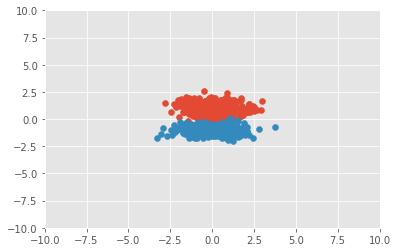

In [8]:
plt.style.use('ggplot')

plt.scatter(positive[:, 0], positive[:, 1])
plt.scatter(negative[:, 0], negative[:, 1])

# y = -(final[0]/final[1])*x
# plt.plot(x, y, '-r')

y = (final[1]/final[0])*x + 140
plt.plot(x, y, '-g')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [23]:
slope = -(final[0]/final[1])
new_positive = []
x, y = positive.shape
for i in range(x):
    d = positive[i][1] - slope*positive[i][0]   
    X = -slope*((d-140)/(slope**2 + 1))
    Y = (-140*(slope**2) + 2*d*(slope**2) + d)/(slope**2 + 1)
    new_positive.append([X[0], Y[0]])
    
new_positive = np.array(new_positive)

slope = -(final[0]/final[1])
new_negative = []
x, y = negative.shape
for i in range(x):
    d = negative[i][1] - slope*negative[i][0]
    X = -slope*((d-140)/(slope**2 + 1))
    Y = (-140*(slope**2) + 2*d*(slope**2) + d)/(slope**2 + 1)
    new_negative.append([X[0], Y[0]])
    
new_negative = np.array(new_negative)

p1, q1 = np.mean(new_positive, axis=0)
p2, q2 = np.mean(new_negative, axis=0)
p = (p1 + p2)/2
q = (q1 + q2)/2

 

# intersection point
# p = (140*slope)/(slope**2 + 1)
# q = p*slope
# print(p)

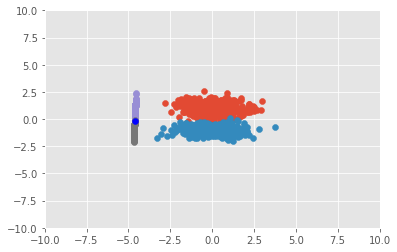

In [24]:
plt.scatter(positive[:, 0], positive[:, 1])
plt.scatter(negative[:, 0], negative[:, 1])
plt.scatter(new_positive[:, 0], new_positive[:, 1])
plt.scatter(new_negative[:, 0], new_negative[:, 1])

plt.scatter(p, q, color='blue')

# y = -(final[0]/final[1])*x
# plt.plot(x, y, '-r')
plt.plot(x, (final[1]/final[0])*x + 140, '-g')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [32]:
acpos = 0
acneg = 0
correct = 0
totpos = 0
totneg = 0

x, y = new_positive.shape
for i in range(x):
    if new_positive[i][1] > q:
        acpos = acpos + 1
        correct = correct + 1
        
x, y = new_negative.shape
for i in range(x):
    if new_negative[i][1] < q:
        acneg = acneg + 1
        correct = correct + 1
      
x, y = X_data.shape
for i in range(x):
    if X_data[i][1] > q:
        totpos = totpos + 1
    else:
        totneg = totneg + 1
        
accuracy = correct / x * 100
precision = acneg / totneg
x, y = new_negative.shape
recall = acneg / x
fscore = (2*precision*recall)/(precision + recall)

In [34]:
fscore, accuracy, precision, recall

(0.9940119760479043, 98.9, 0.9920318725099602, 0.996)